In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import pickle
import matplotlib as mpl
import plotly.graph_objects as go
from scipy import stats

In [2]:
plt.rc("text", usetex=True)  # latex ticks
plt.rc("text.latex")
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern"],
    }
)
plt.rcParams["axes.linewidth"] = 0.4
plt.rcParams["xtick.major.width"] = 0.4
plt.rcParams["xtick.minor.width"] = 0.2
plt.rcParams["ytick.major.width"] = 0.4
plt.rcParams["ytick.minor.width"] = 0.2

Slide_show_width = 4.71512
Paper_width = 6.30045
Format = 1
if Format == 0:
    Image_width = Slide_show_width
if Format == 1:
    Image_width = Paper_width
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })

EXTRA_SMALL = 4
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 9

plt.rc("font", size=EXTRA_SMALL)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=EXTRA_SMALL)  # fontsize of the tick labels
plt.rc("ytick", labelsize=EXTRA_SMALL)  # fontsize of the tick labels
plt.rc("legend", fontsize=EXTRA_SMALL)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
results_dir = "RESULTS/CLEAN_RESULTS_PAPER/CORR_ANALYSIS/CORR_REJECTION_ANALYSIS"
results_dirs = os.listdir(results_dir)

deliveries = np.unique(
    [int(dir_name.split("_427_")[1].split("_")[0]) for dir_name in results_dirs]
)

corr_results = {}
for delivery in deliveries:
    try:
        corr_results_delivery = pickle.load(
            open(f"RESULTS/CORR_ANALYSIS/corr_results_{delivery}.pickle", "rb")
        )
        corr_results[delivery] = corr_results_delivery
    except:
        print(f"delivery {delivery} not found")

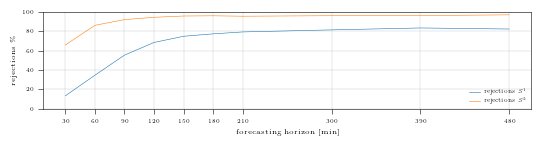

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ttd_titles = ["1h"]
ttd = 0

labels_map = {
    "S1_perc": r"rejections $S^1$",
    "S2_perc": r"rejections $S^2$",
    "S1_exog_rejected": "mode of rejected exog S_1",
}

fig, ax = plt.subplots(figsize=(Paper_width, 0.2 * Paper_width))

for var_set in [11]:
    for forecast_technique in [
        i
        for i in corr_results[0][30][list(corr_results[0][30].keys())[0]].keys()
        if i != "naive" and "_DM_" not in i
    ]:
        if "exog" in forecast_technique:
            continue
        results = {}
        counter_dict = {}
        for delivery in corr_results.keys():
            for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
                if horizon in corr_results[delivery].keys():
                    if horizon not in results:
                        results[horizon] = 0
                        counter_dict[horizon] = 0
                    # choose the trade time
                    trade_times = []
                    for trad in corr_results[delivery][horizon].keys():
                        if len(corr_results[delivery][horizon][trad]) > 0:
                            trade_times.append(trad)
                    trade_time = trade_times[ttd]
                    if len(corr_results[delivery][horizon][trade_time]) > 0:
                        results[horizon] += corr_results[delivery][horizon][trade_time][
                            forecast_technique
                        ]
                        counter_dict[horizon] += 1
        results_plot = []
        for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
            if horizon == 30 and counter_dict[horizon] != 96:
                print(delivery)

            if counter_dict[horizon] == 0:
                results_plot.append(np.nan)
            else:
                results_plot.append(results[horizon] / counter_dict[horizon])

        try:
            ax.plot(
                [480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
                np.array(results_plot) * 100,
                label=labels_map[forecast_technique],
                lw=0.4,
            )
        except:
            continue

# Customize the plot
ax.set_title("")
ax.set_xlabel("forecasting horizon [min]")
ax.set_ylabel("rejections \%")
ax.set_xticks([480, 390, 300, 210, 180, 150, 120, 90, 60, 30])
ax.legend(frameon=False)
ax.grid(visible=True, linewidth=0.2)
ax.set_ylim((0, 100))
# Save the plot as an HTML file (requires mpld3 library)
plt.savefig(
    "../Paper_Figures/corr_filter_rejection_of_variables_over_the_horizon.pdf",
    bbox_inches="tight",
)